# StandardScaler, MinMaxScaler

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [92]:
# Sample data
data = {'height':[150, 160, 170, 180, 190],
        'weight':[50, 60, 70, 80, 90]}
df = pd.DataFrame(data)
df


# height = np.array([150, 160, 170, 180, 190]).reshape(-1, 1)
# weight = np.array([50, 60, 70, 80, 90]).reshape(-1, 1)

# height , weight

,height,weight
0,150,50
1,160,60
2,170,70
3,180,80
4,190,90


In [93]:
# Normalization (Min-Max Scaling)

# Normalization: Jab aapko data ko 0 se 1 ke range mein laana ho (jaise neural networks ke liye)..

scaler = MinMaxScaler()
df['height_norm^'] = scaler.fit_transform(height)
df['weight_norm^'] = scaler.fit_transform(weight)

df
# print("Normalized Height:\n", height_normalized)
# print("Normalized Weight:\n", weight_normalized)

,height,weight,height_norm^,weight_norm^
0,150,50,0.00,0.00
1,160,60,0.25,0.25
2,170,70,0.50,0.50
3,180,80,0.75,0.75
4,190,90,1.00,1.00


In [94]:
# Standardization

# Standardization: Jab aapko mean 0 aur std dev 1 chahiye, aur data ka distribution normal ho.

scaler = StandardScaler()
df['height_stand^'] = scaler.fit_transform(height)
df['weight_stand^'] = scaler.fit_transform(weight)

df

# print("\nStandardized Height:\n", height_standardized)
# print("Standardized Weight:\n", weight_standardized)

,height,weight,height_norm^,weight_norm^,height_stand^,weight_stand^
0,150,50,0.00,0.00,-1.414214,-1.414214
1,160,60,0.25,0.25,-0.707107,-0.707107
2,170,70,0.50,0.50,0.000000,0.000000
3,180,80,0.75,0.75,0.707107,0.707107
4,190,90,1.00,1.00,1.414214,1.414214


In [95]:
df.describe()

,height,weight,height_norm^,weight_norm^,height_stand^,weight_stand^
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,170.000000,70.000000,0.500000,0.500000,0.000000,0.000000
std,15.811388,15.811388,0.395285,0.395285,1.118034,1.118034
min,150.000000,50.000000,0.000000,0.000000,-1.414214,-1.414214
25%,160.000000,60.000000,0.250000,0.250000,-0.707107,-0.707107
50%,170.000000,70.000000,0.500000,0.500000,0.000000,0.000000
75%,180.000000,80.000000,0.750000,0.750000,0.707107,0.707107
max,190.000000,90.000000,1.000000,1.000000,1.414214,1.414214


#  RobustScaler

In [111]:
from sklearn.preprocessing import RobustScaler

# Sample data with outliers
data = np.array([
    [1, 100],
    [2, 200],
    [3, 300],
    [4, 400],
    [5, 5000]  # Outlier
])

print("Original Data:")
df  = pd.DataFrame(data1)
df1 = df.rename(columns={0:'Range', 1:'Number'})
df1

Original Data:


,Range,Number
0,1,100
1,2,200
2,3,300
3,4,400
4,5,5000


In [112]:
# Object of RobustScaler
scaler = RobustScaler()

# Data scale
scaled_range = scaler.fit_transform(data)
# df['scaled_Number'] = scaler.fit_transform(data)

print("\nScaled Data:")
df = pd.DataFrame(scaled_range)
df2 = df.rename(columns={0:'scale_Range', 1:'scale_Number'})
df2


Scaled Data:


,scale_Range,scale_Number
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,1.0,23.5


# Logarithmic Transformation

In [124]:
# Original skewed data (e.g., income in thousands)
data = [1000, 5000, 10000, 50000, 100000, 200000, 500000]

# Convert to a pandas DataFrame for simplicity
df = pd.DataFrame(data, columns=["Income"])

df

,Income
0,1000
1,5000
2,10000
3,50000
4,100000
5,200000
6,500000


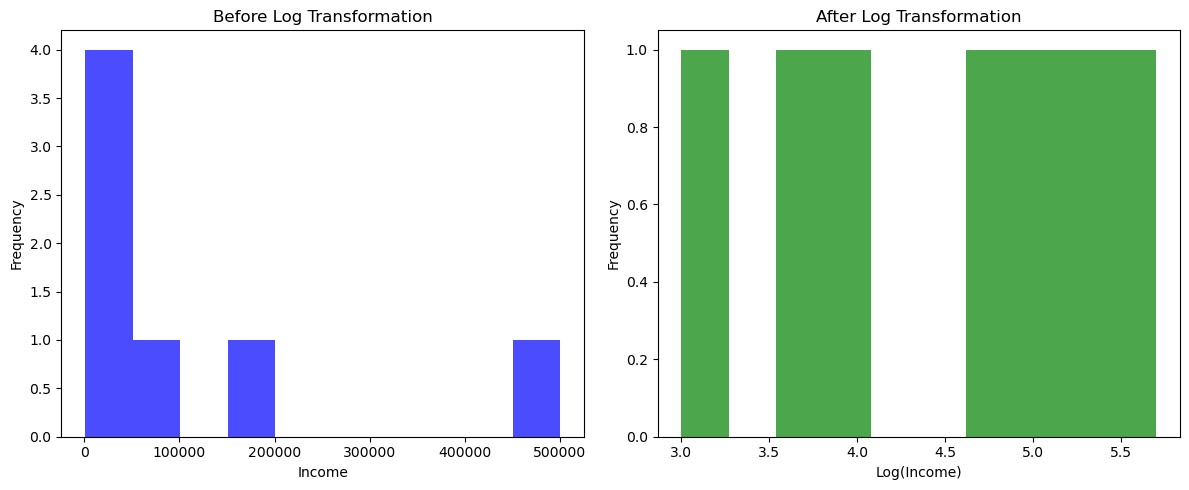

In [125]:
# Histogram before log transformation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df["Income"], bins=10, color='blue', alpha=0.7)
plt.title("Before Log Transformation")
plt.xlabel("Income")
plt.ylabel("Frequency")

# Apply log transformation
df["Log_Income"] = np.log10(df["Income"])

# Histogram after log transformation
plt.subplot(1, 2, 2)
plt.hist(df["Log_Income"], bins=10, color='green', alpha=0.7)
plt.title("After Log Transformation")
plt.xlabel("Log(Income)")
plt.ylabel("Frequency")

# Show both histograms
plt.tight_layout()
plt.show()